In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import community
import os
from funciones import *
import scipy.misc
from scipy.sparse import csr_matrix
import scipy.sparse.csgraph as sc
import copy
import itertools

In [15]:
#------------------------------------------------------------------------------------------------------
#                                 Trabajo Computacional 3
#------------------------------------------------------------------------------------------------------

# Primero creamos la red de delfines: agregamos los enlaces sin necesidad de agregar antes los nodos
mydolphins = nx.read_gml('dolphins.gml')

# Para agregar el dato del genero a partir del txt:
# creamos dos listas: una de nombres de delfines (nodos) y otra de los generos correspondientes
Gender = pd.read_csv('dolphinsGender.txt', sep='\t', header=None)
delfines = Gender[0] # nombres de delfines (nodos)
genero = Gender[1]   # genero de los delfines en el mismo orden que los nodos

# A cada uno de los nodos ya existentes en el grafo, se le agrega el genero
for d,g in zip(delfines,genero):
    mydolphins.add_node(d, gender=g)
    
#Output folder:
outfolder='./resultados_fast_greedy/'

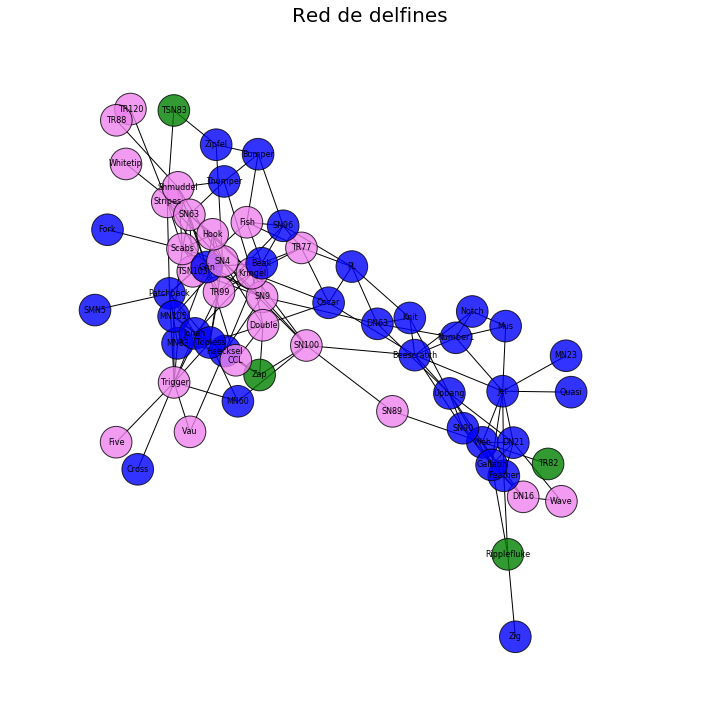

In [16]:
#------------------------------------------------------------------------------------------------------
#Grafico Original
#------------------------------------------------------------------------------------------------------
width=12
height=12
fig=plt.figure(figsize=(width, height))
fig.patch.set_facecolor('white')

#Posiciones de los nodos
#pos = nx.spring_layout(mydolphins)
#Asi siempre grafica lo mismo
pos={'TR77': [-0.00686432,  0.20671214], 'SN4': [-0.30167655,  0.1709983 ], 'MN105': [-0.48412144,  0.02281396], 'MN83': [-0.46944408, -0.04991709], 'Shmuddel': [-0.46766429,  0.36944462], 'Vau': [-0.42298501, -0.28769828], 'SN90': [ 0.59618263, -0.27801198], 'Bumper': [-0.16871511,  0.4586046 ], 'SMN5': [-0.77760313,  0.0395804 ], 'Stripes': [-0.50783091,  0.3303615 ], 'Quasi': [ 1.        , -0.18112197], 'DN16': [ 0.82094776, -0.46242208], 'Whitetip': [-0.66190052,  0.43242722], 'Fork': [-0.73091456,  0.25552539], 'Grin': [-0.36074806,  0.15523022], 'PL': [0.18131467, 0.15653464], 'DN21': [ 0.78411834, -0.31682214], 'Trigger': [-0.48236803, -0.1548581 ], 'SN89': [ 0.33282518, -0.23263502], 'Oscar': [0.09453741, 0.05925168], 'Fish': [-0.21062552,  0.27569265], 'SN63': [-0.42534403,  0.29564573], 'SN100': [ 0.0114244 , -0.05565292], 'SN9': [-0.15391299,  0.07498991], 'TR99': [-0.31469055,  0.08795352], 'CCL': [-0.25197153, -0.09534079], 'DN63': [0.27664047, 0.00265266], 'Topless': [-0.34901076, -0.04751828], 'Upbang': [ 0.54549589, -0.1844215 ], 'TR82': [ 0.91382896, -0.37402259], 'Knit': [0.39761589, 0.01846514], 'Zap': [-0.16312988, -0.13489098], 'Jet': [ 0.74434305, -0.1784962 ], 'Double': [-0.15038254, -0.00120439], 'Cross': [-0.61803759, -0.38844752], 'Hook': [-0.3384137 ,  0.24327099], 'Wave': [ 0.96374634, -0.47444471], 'Mus': [ 0.75550099, -0.00351393], 'TR120': [-0.64532706,  0.57999096], 'Patchback': [-0.49964881,  0.08446744], 'SN96': [-0.07512146,  0.26618326], 'Gallatin': [ 0.70301601, -0.37641514], 'Five': [-0.69876631, -0.31554103], 'Notch': [0.63079813, 0.03576706], 'Beak': [-0.15531096,  0.16553754], 'Kringel': [-0.19166107,  0.13881005], 'Web': [ 0.66849069, -0.31601452], 'Scabs': [-0.45119676,  0.20397036], 'MN60': [-0.24415948, -0.20565683], 'Number1': [ 0.56972977, -0.03490899], 'Thumper': [-0.29542824,  0.38534941], 'TSN83': [-0.48332259,  0.57613593], 'TSN103': [-0.41262492,  0.14370002], 'MN23': [ 0.98120322, -0.0832051 ], 'Feather': [ 0.74874531, -0.4058308 ], 'Jonah': [-0.40488327, -0.02305368], 'TR88': [-0.69803733,  0.54972405], 'Zig': [ 0.79160867, -0.83867743], 'Beescratch': [ 0.41616125, -0.08156713], 'Haecksel': [-0.29259803, -0.07059502], 'Zipfel': [-0.32524628,  0.48412704], 'Ripplefluke': [ 0.76341264, -0.61701228]}

#Nodos
#nx.draw_networkx_nodes(mydolphins,pos,nodelist=mydolphins.nodes(),node_color=["blue" if g=='m' else "violet" if g=='f' else "green" for g in nx.get_node_attributes(mydolphins, "gender").values()],with_labels=True,node_size=1000,alpha=0.8)
nx.draw_networkx_nodes(mydolphins,pos,nodelist=list(delfines),node_color=["blue" if g=='m' else "violet" if g=='f' else "green" for g in list(genero)],with_labels=True,node_size=1000,alpha=0.8)

#Enlaces
nx.draw_networkx_edges(mydolphins,pos,width=1.0,alpha=1)

#Etiquetas
nx.draw_networkx_labels(mydolphins,pos,font_size=8)
plt.title('Red de delfines',fontsize=20)
plt.axis('off')
plt.show()

In [17]:
#------------------------------------------------------------------------------------------------------
#Metodo: Fast Greedy
#------------------------------------------------------------------------------------------------------
comus = nx.algorithms.community.greedy_modularity_communities(mydolphins, weight=None)
comunidades=list(comus)
print(comunidades)

[frozenset({'TR99', 'Thumper', 'Scabs', 'Beak', 'Zipfel', 'Whitetip', 'Bumper', 'Fish', 'TR88', 'SN4', 'Stripes', 'Hook', 'SN96', 'Fork', 'Kringel', 'Oscar', 'TR77', 'SN9', 'TR120', 'Shmuddel', 'SN63', 'TSN83', 'TSN103', 'Grin'}), frozenset({'DN21', 'Wave', 'Number1', 'DN16', 'Web', 'TR82', 'Zig', 'Jet', 'Knit', 'MN23', 'Upbang', 'DN63', 'Feather', 'Notch', 'PL', 'Beescratch', 'Quasi', 'Gallatin', 'Ripplefluke', 'SN90', 'Mus'}), frozenset({'Patchback', 'Vau', 'MN60', 'Topless', 'MN105', 'Haecksel', 'Double', 'Trigger', 'Jonah', 'MN83', 'SMN5', 'Five', 'CCL', 'Cross', 'Zap'}), frozenset({'SN100', 'SN89'})]


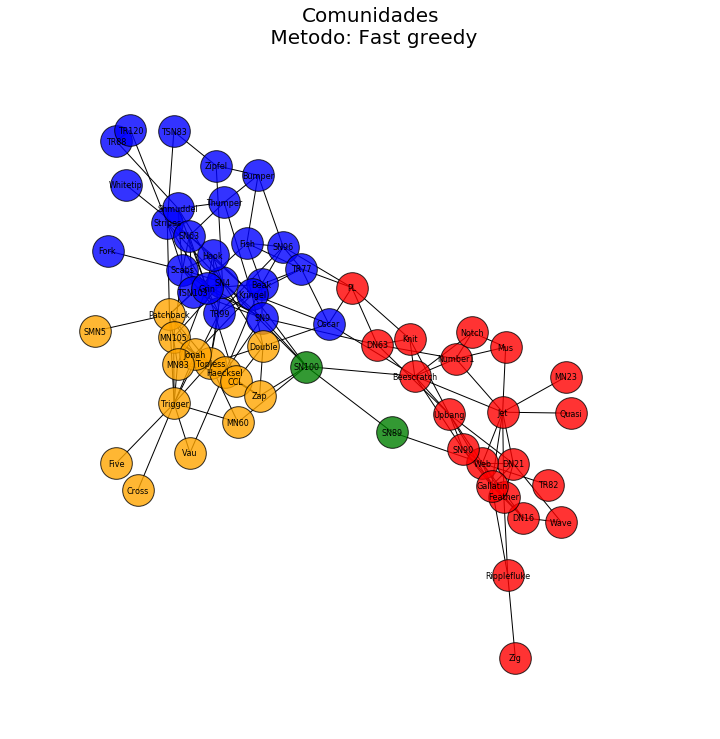

In [18]:
#------------------------------------------------------------------------------------------------------
#1.a)Visualice los resultados gráficamente
#------------------------------------------------------------------------------------------------------
colores=['blue','red','orange','green']
width=12
height=12
fig = plt.figure(figsize=(width, height))
fig.patch.set_facecolor('white')

#Nodos
for c,comu in enumerate(comunidades):
    nx.draw_networkx_nodes(mydolphins,pos,nodelist=comu,node_color=colores[c],node_size=1000,alpha=0.8)

#Enlaces
nx.draw_networkx_edges(mydolphins,pos,width=1.0,alpha=1)

#Etiquetas
nx.draw_networkx_labels(mydolphins,pos,font_size=8)
plt.title('Comunidades\n Metodo: Fast greedy',fontsize=20)
plt.axis('off')

plt.show()

In [19]:
#-------------------------------------------------------------------------------
#1.b) Modularidad y Silouhette:
#-------------------------------------------------------------------------------
#Asignamos a cada nodo del grafo la propiedad comunity que tendrá un color.

for c,comu in enumerate(comunidades):
    for delfin in list(comu):
        mydolphins.node[delfin]['comunity']=colores[c]
#-------------------------------------------------------------
#Modularidad:
#-------------------------------------------------------------
#Matriz de Adyacencias Aij:
delfines=mydolphins.nodes()
A = np.array(nx.to_numpy_matrix(mydolphins,nodelist=delfines))
N=mydolphins.number_of_nodes()
m=mydolphins.number_of_edges()
grado = dict(mydolphins.degree())

#Matriz de variable categorica comunidad: Cij=delta(ci,cj)
C=np.zeros(np.shape(A))
for ni, idelfin in enumerate(delfines):
    for nj, jdelfin in enumerate(delfines):
        if mydolphins.nodes[idelfin]['comunity']==mydolphins.nodes[jdelfin]['comunity']:
            C[ni,nj]=1

#Calculo de la modularidad
#Q/Qmax=(S1-S2)*(1/2m)

#S1=Suma en nodos (Aij*Cij)
#S2=Suma en nodos(kikj*Cij/2m)
S1=0
S2=0

for ni, idelfin in enumerate(delfines):
    for nj, jdelfin in enumerate(delfines):  
        S1=S1+A[ni,nj]*C[ni,nj]
        S2=S2+grado[idelfin]*grado[jdelfin]*C[ni,nj]
S2=S2/(2*m)
mod=(S1-S2)/(2*m)

print('Modularidad = {0:.3f}'.format(mod))


Modularidad = 0.492


In [20]:
#Calculando la modularidad de cada comunidad:
modularidades=[]
for c,comu in enumerate(comunidades):
    s1=0
    s2=0
    for idelfin in list(comu):
        for jdelfin in list(comu):
            #Buscamos los indices en la lista de delfines para luego acceder a la matrix de Ady con esos indices ni y nj:
            ni=[idx for idx,d in enumerate(delfines) if d==idelfin]
            nj=[idx for idx,d in enumerate(delfines) if d==jdelfin]
            s1=s1+A[ni,nj]
            s2=s2+grado[idelfin]*grado[jdelfin]
    s2=s2/(2*m)
    mod=(s1-s2)/(2*m)
    modularidades.append(float(mod))

print('Modularidades por comunidad:')
print(modularidades)
print('Modularidad = {0:.3f}'.format(np.sum(modularidades)))

#Output
'''
output={}
output['color']=colores
output['mod']=modularidades
df=pd.DataFrame(output)
df.to_csv(outfolder+'modularidades.txt',sep='\t')
'''

Modularidades por comunidad:
[0.16834777105336024, 0.18997468454570626, 0.12851548593805623, 0.005488311380087813]
Modularidad = 0.492


"\noutput={}\noutput['color']=colores\noutput['mod']=modularidades\ndf=pd.DataFrame(output)\ndf.to_csv(outfolder+'modularidades.txt',sep='\t')\n"

Silhouette S[i]=
[('TR99', 0.008620689655172382), ('DN16', 0.08571428571428577), ('TR82', -0.02777777777777785), ('Knit', 0.12380952380952373), ('Jonah', 0.35438596491228064), ('Double', 0.15636363636363632), ('Ripplefluke', 0.3197278911564626), ('Thumper', 0.2166666666666667), ('Scabs', 0.26785714285714296), ('SN90', 0.023809523809523836), ('Fork', 0.21250000000000002), ('Beak', 0.2), ('TR88', 0.22619047619047614), ('Patchback', 0.30566037735849055), ('Whitetip', 0.23809523809523814), ('Bumper', 0.31250000000000006), ('Fish', 0.045138888888888916), ('Web', -0.10000000000000003), ('Topless', 0.4571428571428572), ('Zig', 0.2698412698412699), ('SN89', 0.8055555555555556), ('SN4', -0.16279069767441864), ('Feather', 0.2761904761904762), ('Notch', -0.04545454545454546), ('MN83', 0.36551724137931024), ('Trigger', 0.4666666666666667), ('Gallatin', 0.35238095238095235), ('Five', 0.3714285714285714), ('CCL', -0.029605263157894635), ('Hook', 0.25), ('Cross', 0.3714285714285714), ('MN105', 0.2857

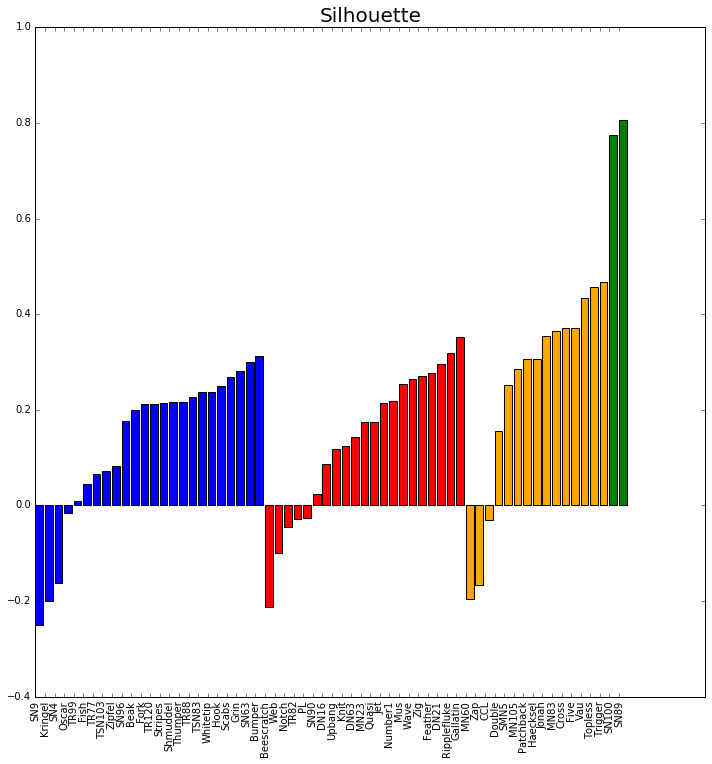

In [21]:
#-------------------------------------------------------------
#Silhouette:
#-------------------------------------------------------------
#distancia promedio de un nodo a todos los de su comunidad
#distancia se podria medir como el numero de links en el camino mas corto para llegar a otro.
#Ej:
#distancia entre 'Jet' y 'Trigger' = len(nx.shortest_path(mydolphins,'Jet','Trigger')) - 1

#Calculo de a[i]
a=[] #contendra para cada nodo en delfines la distancia promedio a nodos de su misma comunidad
for idelfin in delfines:
    distancias=[]
    for jdelfin in delfines:
        if mydolphins.nodes[idelfin]['comunity']==mydolphins.nodes[jdelfin]['comunity']:
               distancias.append(len(nx.shortest_path(mydolphins,idelfin,jdelfin))-1)         
    promedio=np.mean(distancias)
    a.append(promedio)

#Calculo de b[i]
b=[] #contendria para cada nodo en delfines la distancia promedio a nodos de otras comunidades, devuelvo  el promedio minimo
for idelfin in delfines: 
    #Me quedo con las comunidades distintas a la del delfin idelfin
    comuni=['blue','red','orange','green']
    comuni.remove(mydolphins.node[idelfin]['comunity'])
    b_comuni=[]
    for c in comuni:
        distancias=[]
        for jdelfin in delfines:
            if mydolphins.nodes[jdelfin]['comunity']==c:
                distancias.append(len(nx.shortest_path(mydolphins,idelfin,jdelfin))-1)
        promedio_comuni=np.mean(distancias)
        b_comuni.append(promedio_comuni)
    b.append(min(b_comuni))
    comuni=['blue','red','orange','green'] #vuelvo a comuni al inicial

#Calculo el Silhouette:
S=[]
for i,idelfin in enumerate(delfines):
    s=(b[i]-a[i])/(max(b[i],a[i]))
    S.append(s)
    #guardo la propiedad silhouette en el grafo:
    mydolphins.node[idelfin]['silhouette']=s
print('Silhouette S[i]=')
print (mydolphins.nodes.data('silhouette'))

#Output
'''
df = pd.DataFrame.from_dict(dict(mydolphins.nodes.data('silhouette')), orient="index")
df.to_csv(outfolder+'silhouette.txt',sep='\t')
'''

#Grafico de Silhouette:
width=12
height=12
plt.figure(figsize=(width, height))
delfines=np.sort(delfines)
x = []
xTicks = []
contador=-1
dtype = [('name', 'S21'), ('silhouette', float)]
for c in colores:
    delf_S=[] #lista con pares de [delfin,silouette]
    for i, idelfin in enumerate(delfines):
        if mydolphins.nodes[idelfin]['comunity']==c:
            delf_S.append((str(idelfin),mydolphins.nodes[idelfin]['silhouette']))        
    delf_S=np.array(delf_S,dtype=dtype)
    delf_S=np.sort(delf_S,order='silhouette') #lo ordeno segun la propiedad silhouette
    delf_S=list(delf_S)
    for j,d in enumerate(delf_S):
        contador=contador+1
        delfin=str(delf_S[j][0],'utf-8')
        silhouette_value=delf_S[j][1]
        plt.bar(contador,silhouette_value,color=mydolphins.nodes[delfin]['comunity'])#grafico una barra
        x.append(contador)
        xTicks.append(delfin)
plt.xticks(x, xTicks)
plt.xticks(range(len(delfines)),xTicks, rotation=90)
plt.title('Silhouette',fontsize=20)
plt.show()

In [54]:
#------------------------------------------------------------------------------
#1b) Rewirings:
#------------------------------------------------------------------------------
#Se podria tomar la red original recablear, y luego para las comunidades encontradas
#en la red original contar los enlaces que se hayan entre esos nodos.
#O sea estariamos calculando de forma simulada el valor kikj/2L.
#Haremos un histograma del numero de enlaces en esa comunidad.

#iteraciones=20000 #descomentar para que corra
Recableados={} #es un diccionario que tiene como keys ['comunidadi'] y como propiedades['color','lc_real','lc_random'].
               #lc_random es una lista de tamano 'iteraciones' y que contiene el numero de enlaces dentro de esa comunidadn uno de esos recableados
lc_random=[[],[],[],[]]


#Recableamos y contamos enlaces en cada comunidad
for it in range(0,iteraciones):
    D=rewiring(mydolphins) #creamos un nuevo grafo recableado:
    D_ady = np.array(nx.to_numpy_matrix(D,nodelist=delfines))
    for c,comu in enumerate(comunidades):
        enlaces=0
        for idelfin in list(comu):
            for jdelfin in list(comu):
                #Buscamos los indices en la lista de delfines para luego acceder a la matrix de Ady con esos indices ni y nj:
                ni=[idx for idx,d in enumerate(delfines) if d==idelfin]
                nj=[idx for idx,d in enumerate(delfines) if d==jdelfin]
                enlaces=enlaces+D_ady[ni,nj]
        lc_random[c].append(int(enlaces)/2)
        Recableados['comunidad'+str(c)]={'color':colores[c],'lc_real':0,'lc_random':list(lc_random[c])}

#Contamos enlaces en cada comunidad de la red original:
modularidad_rewiring
for c,comu in enumerate(comunidades):
        enlaces=0
        for idelfin in list(comu):
            for jdelfin in list(comu):
                #Buscamos los indices en la lista de delfines para luego acceder a la matrix de Ady con esos indices ni y nj:
                ni=[idx for idx,d in enumerate(delfines) if d==idelfin]
                nj=[idx for idx,d in enumerate(delfines) if d==jdelfin]
                enlaces=enlaces+A[ni,nj]
        enlaces=int(enlaces)/2
        Recableados['comunidad'+str(c)]['lc_real']=enlaces

#Graficamos:
'''
for c,comu in enumerate(comunidades):
    plt.figure(c)
    plt.hist(Recableados['comunidad'+str(c)]['lc_random'],color=colores[c],linewidth=1.5,edgecolor='black',label='Red recableada',alpha=0.8,normed=1)
    plt.axvline(x=Recableados['comunidad'+str(c)]['lc_real'],color=colores[c],linewidth=2,label='Red Real')
    plt.xlabel('$Numero$ $de$ $enlaces$ $dentro$ $de$ $la$ $comunidad$')
    plt.ylabel('$Frecuencia$')
    plt.legend(loc='upper center')
    plt.title('Modularidad '+' comunidad '+colores[c])
    plt.savefig(outfolder+'comunidad_'+colores[c]+'_hist.png')
'''    

#Output
'''
for c,comu in enumerate(comunidades):
    lc_real=Recableados['comunidad'+str(c)]['lc_real'] #numero de enlaces dentro de la comunidad en la red real
    lc_rewiring=np.mean(Recableados['comunidad'+str(c)]['lc_random'])#numero de enlaces promedio dentro de la comunidad para un cierto numero de redes recableadas.
    modularidad_por_rewiring=(lc_real-lc_rewiring)/m #dividimos por el numero de enlaces totales.
    output={}
    output['comunidad']=Recableados['comunidad'+str(c)]['color']
    output['enlaces_red_real']=lc_real
    output['enlaces_red_recabelada']=lc_rewiring
    output['modularidad por rewiring']=modularidad_por_rewiring
    output['modularidad por cuenta teorica']=modularidades[c]
    output['enlaces_red_random']=list(Recableados['comunidad'+str(c)]['lc_random'])
    df = pd.DataFrame.from_dict(output, orient="index")
    df.to_csv(outfolder+'comunidad_'+colores[c]+'_data.txt',sep='\t')
'''

NameError: name 'iteraciones' is not defined

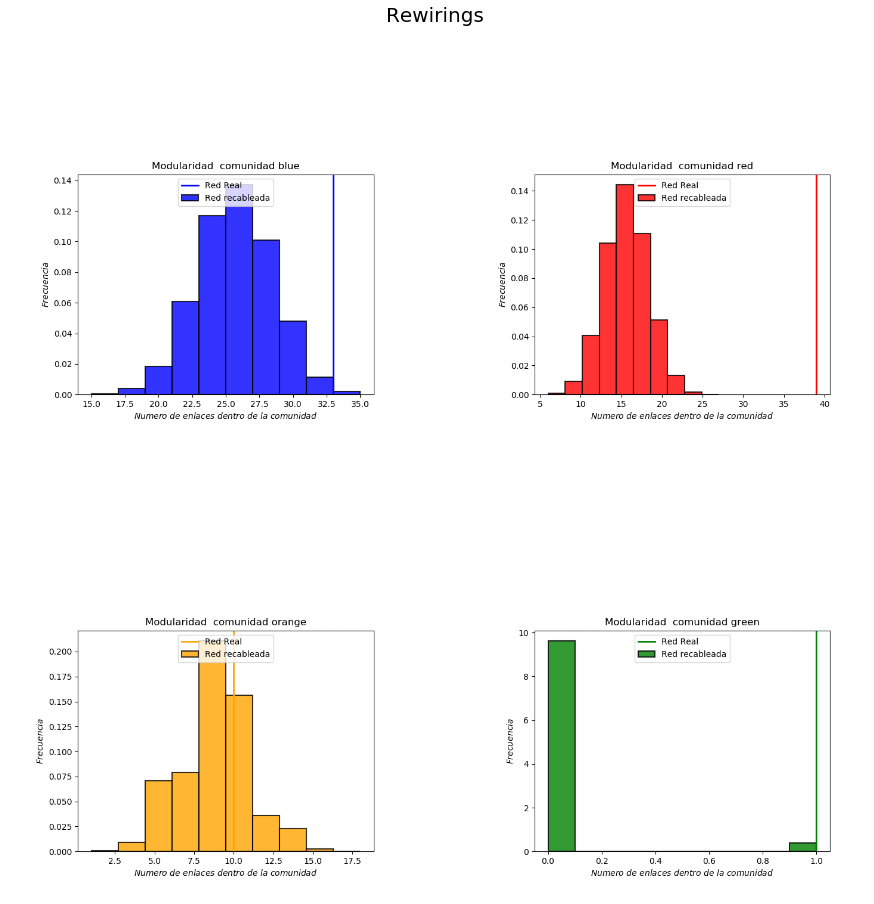

In [22]:
plt.figure(figsize=(15,15))
plt.suptitle('Rewirings',fontsize=20)
plt.subplot(2,2,1)
blue=plt.imread('resultados_fast_greedy/comunidad_blue_hist.png')
plt.imshow(blue)
plt.axis('off')

plt.subplot(2,2,2)
red=plt.imread('resultados_fast_greedy/comunidad_red_hist.png')
plt.imshow(red)
plt.axis('off')

plt.subplot(2,2,3)
orange=plt.imread('resultados_fast_greedy/comunidad_orange_hist.png')
plt.imshow(orange)
plt.axis('off')

plt.subplot(2,2,4)
green=plt.imread('resultados_fast_greedy/comunidad_green_hist.png')
plt.imshow(green)
plt.axis('off')

plt.show()

In [23]:
#Se hicieron 20000 recableados en cada red y en cada uno contamos la cantidad de enlaces dentro de cada comunidad:
#Los resultados estan en la carpeta resultados_fast_greedy.

enlaces_red_real=[33,39,10,1]
enlaces_red_rewiring=[25.2,15.7,8.8,0.038]#valor medio del histograma
modularidad_rewiring=[0.0489,0.146,0.007,0.006]


In [25]:
#-----------------------------------------------------------------------------------------------------------------------------
#1d)Tests de Fisher para ver la relacion entre genero y comunidades encontradas:
#-----------------------------------------------------------------------------------------------------------------------------
Generos={} 
#Es  un diccionario que tiene como keys ['comunidadi'] y como propiedades['color','dc','fc','mc','pFish','pvalor'].
#dc: numero de delfines en la comunidad. 
#fc: numero de hembras en la comunidad.
#mc: numero de machos en la comunidad.
#pFish: probabilidad de que hayan hc hembras en la comunidad por azar. pFish=(F fc)(D-F dc-fc)/(D dc)  donde (A a)=A!/a!(A-a)!
#D: numero total de delfines con genero f o m
#F: numero total de hembras
#M: numero total de machos

delfinesF=[delfines[i] for i,idelfin in enumerate(delfines) if mydolphins.node[idelfin]['gender']=='f']
delfinesM=[delfines[i] for i,idelfin in enumerate(delfines) if mydolphins.node[idelfin]['gender']=='m']
F=len(delfinesF)
M=len(delfinesM)
D=M+F

for c,comu in enumerate(comunidades):
    dc=0
    fc=0
    mc=0
    for idelfin in list(comu):
        if mydolphins.node[idelfin]['gender']=='f':
            dc=dc+1
            fc=fc+1
        elif mydolphins.node[idelfin]['gender']=='m':
            dc=dc+1
            mc=mc+1
    pFish=scipy.misc.comb(F,fc)*scipy.misc.comb(D-F,dc-fc)/scipy.misc.comb(D,dc)
    #Calculo del pvalor:
    pvalor=0
    for f in range(fc,F+1):
        pvalor=pvalor+(scipy.misc.comb(F,f)*scipy.misc.comb(D-F,dc-f)/scipy.misc.comb(D,dc))
    Generos['comunidad'+str(c)]={'color':colores[c],'dc':dc,'fc':fc,'mc':mc,'pFish':pFish,'pvalor':pvalor}
    
#Para chequear que este bien la cuenta se puede usar:
#import scipy.stats as stats    
#scipy.stats.fisher_exact(table, alternative='less')
#donde la tabla de contingencias es: Comunidad/Nocomunidad     Machos/Hembras
#[[mc,fc],[M-mc,F-fc]]
    
#Output
'''
df = pd.DataFrame.from_dict(dict(Generos), orient="index")
df.to_csv(outfolder+'generos.txt',sep='\t')
'''


'\ndf = pd.DataFrame.from_dict(dict(Generos), orient="index")\ndf.to_csv(outfolder+\'generos.txt\',sep=\'\t\')\n'

In [26]:
Generos



{'comunidad0': {'color': 'blue',
  'dc': 23,
  'fc': 15,
  'mc': 8,
  'pFish': 0.00269788584395019,
  'pvalor': 0.0032049208787337862},
 'comunidad1': {'color': 'red',
  'dc': 19,
  'fc': 2,
  'mc': 17,
  'pFish': 0.0006798995698764223,
  'pvalor': 0.9999422036385638},
 'comunidad2': {'color': 'orange',
  'dc': 14,
  'fc': 5,
  'mc': 9,
  'pFish': 0.2197970236711812,
  'pvalor': 0.7882824282705964},
 'comunidad3': {'color': 'green',
  'dc': 2,
  'fc': 2,
  'mc': 0,
  'pFish': 0.16696914700544466,
  'pvalor': 0.16696914700544466}}

In [28]:
dc=[22,20,14,2]#numero de delfines totales en cada comunidad
fc=[15,2,5,2]#numero de hembras en cada comunidad
mc=[7,18,9,0]#numero de machos en cada comunidadish
pFish=[0.0027,0.0007,0.22,0.166]#probabilidad del test de Fischer
pvalor=[0.0032,0.999,0.788,0.166]#p-valor

tabla_resumen = pd.DataFrame({"Comunidades":["Blue","Red","Orange","Green"],
                    "Modularidad (teórica)":modularidades,
                    "Modularidad (rewiring)":modularidad_rewiring,
                    "Enlaces (red real)":enlaces_red_real,
                    "Enlaces (red rewiring)":enlaces_red_rewiring,
                    "Ndelfines":dc,
                    "Nhembras":fc,
                    "Nmachos":mc,
                    "pFischer":pFish,
                    "pValor":pvalor,
                   })
tabla_resumen

,Comunidades,Enlaces (red real),Enlaces (red rewiring),Modularidad (rewiring),Modularidad (teórica),Ndelfines,Nhembras,Nmachos,pFischer,pValor
0,Blue,33,25.200,0.0489,0.168348,22,15,7,0.0027,0.0032
1,Red,39,15.700,0.1460,0.189975,20,2,18,0.0007,0.9990
2,Orange,10,8.800,0.0070,0.128515,14,5,9,0.2200,0.7880
3,Green,1,0.038,0.0060,0.005488,2,2,0,0.1660,0.1660


Clique Percolation...
comunidad final
[['Mus', 'Number1', 'Jet'], ['Notch', 'Mus', 'Number1'], ['Notch', 'Number1', 'Beescratch'], ['Number1', 'Jet', 'Beescratch']]
comunidad final
[['DN16', 'Feather', 'Gallatin'], ['DN16', 'Web', 'Feather'], ['DN16', 'Web', 'Gallatin'], ['Feather', 'Gallatin', 'DN21'], ['Feather', 'Gallatin', 'Jet'], ['Feather', 'Jet', 'DN21'], ['Gallatin', 'Jet', 'DN21'], ['Gallatin', 'Upbang', 'DN21'], ['Knit', 'DN63', 'PL'], ['Knit', 'DN63', 'Upbang'], ['Knit', 'Upbang', 'Beescratch'], ['Ripplefluke', 'Feather', 'Gallatin'], ['SN90', 'Feather', 'Gallatin'], ['SN90', 'Gallatin', 'Upbang'], ['SN90', 'Upbang', 'Beescratch'], ['SN90', 'Web', 'Feather'], ['SN90', 'Web', 'Gallatin'], ['SN90', 'Web', 'Upbang'], ['Web', 'Feather', 'DN21'], ['Web', 'Feather', 'Gallatin'], ['Web', 'Feather', 'Jet'], ['Web', 'Gallatin', 'DN21'], ['Web', 'Gallatin', 'Jet'], ['Web', 'Gallatin', 'Upbang'], ['Web', 'Jet', 'DN21'], ['Web', 'Upbang', 'DN21']]
comunidad final
[['Beak', 'Fish', 'SN96

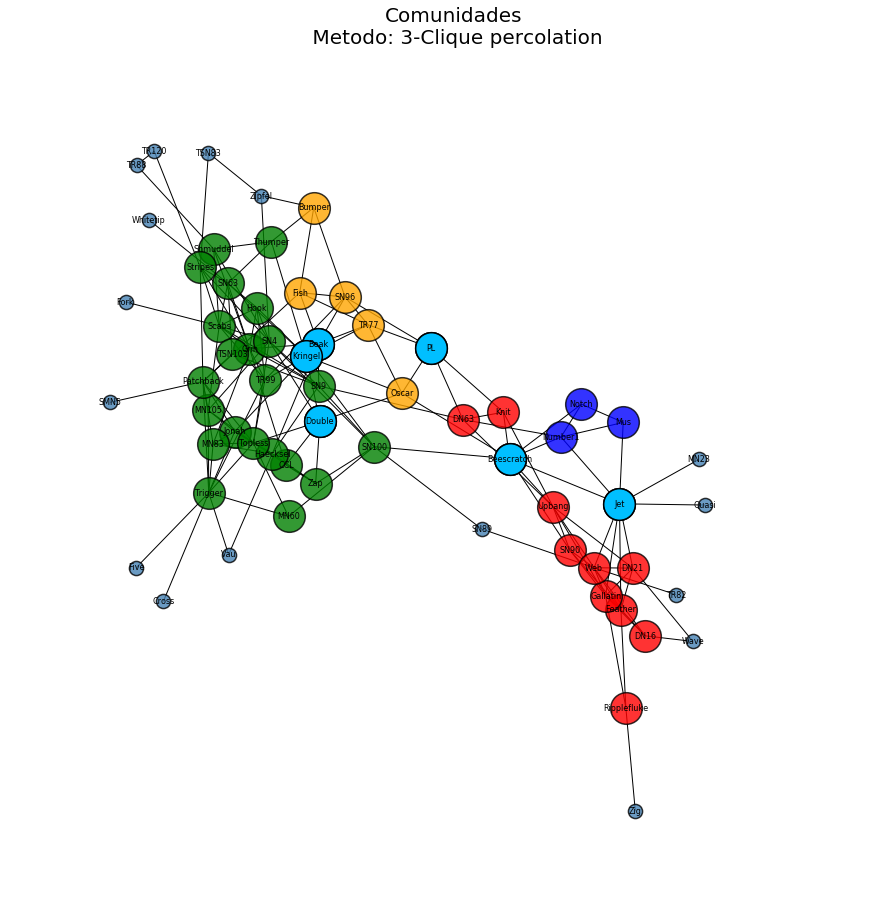

In [29]:
#-----------------------------------------------------------------------------------------------------------------------------
#2)k-Clique Percolation:
#-----------------------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------
#Parte A) Calculos previos:
#-----------------------------------------------------------------------------------------------------------------------------
print('Clique Percolation...')
cliques=list(nx.enumerate_all_cliques(mydolphins))
k=3 #Tipo de k-cliques que queremos percolar.
cliques_k=[] #nos quedamos con los k_cliques.
for c,clique in enumerate(cliques):
    if len(clique)==k:
        cliques_k.append(clique)

#CLiques_k es la matriz de Overlap de k-cliques:
Cliques_k=np.zeros((len(cliques_k),len(cliques_k)))

for i,iclique in enumerate(cliques_k):
    for j,jclique in enumerate(cliques_k):
        if len(set(iclique).intersection(set(jclique)))==k-1:#dos 3-cliques se overlapean si son adyacentes o sea si comparten un link.
            Cliques_k[i][j]=1
            Cliques_k[j][i]=1

#Usamos el algoritmo de reverse_cuthill_mckee para generar una matriz de bloques:(creo que debe ser similar a hacer formad de Jordan este algoritmo)
#(No creo que sea del todo necesario pero creo que reduce el tiempo de computo para lo que viene despues)
            
A=Cliques_k

A=np.array(A)
B=csr_matrix(A) #Cliques_tres en forma sparse para poder pasarselo al metodo se necesita la matriz en esta forma
C=np.zeros((np.shape(A)[0],np.shape(A)[0]))
orden=sc.reverse_cuthill_mckee(B,symmetric_mode=True) #ordena los vectores columna en la matriz A de forma de obtener una matriz C de bloques.
orden=list(orden)
for i,o in enumerate(orden):
    for j,p in enumerate(orden):
        C[i,j]=A[o][p]

#cliques hay que ordenarlo segun el vector orden.
cliques_k_ordenados=[]
for c,clique in enumerate(cliques_k):
    nuevo=copy.deepcopy(cliques_k[orden[c]])
    cliques_k_ordenados.append(nuevo)

#-----------------------------------------------------------------------------------------------------------------------------
#Parte B) Percolacion de cliques:
#-----------------------------------------------------------------------------------------------------------------------------
#Hasta aca tenemos cliques_tres_ordenados.
#Ahora tenemos que encontrar las comunidades:
#Hago una copia de cliques que tengo:

cliques=copy.deepcopy(cliques_k_ordenados) #lo copiamos ya que vamos a ir eliminando cliques de la lista cliques pero cliques_tres_ordenados la conservamos intacta

#Estrategia: vamos buscando cliques en la lista cliques y cuando son adyaentes los agarro y los agrego a la lista comunidad_cliques
Comunidades=[]
comunidad_cliques=[copy.deepcopy(cliques[0])] #acá es donde vamos a ir poniendo los cliques que vamos encontrando que son adyacentes
                                              #el valor inicial de la comunidad_cliques son los delfines del primer clique de la lista cliques

while len(cliques)>1: #terminamos cuando se me acabaron los cliques en a lista cliques
    cliques_to_remove=[] #cuando encuentro que hay una interseccion entre el jclique con algno de la comunidad lo tengo que eliminar de la lista cliques
    cliques_to_remove.append(0)#asi elimino tambien el primer elemento
    #print('cliques actualizados:')
    #print(cliques)

    tamanocliquesold=len(cliques) 
    tamanocliquesnew=len(cliques)+1
    
    #Lo siguiente es MUCHO MUY IMPORTANTE!:
    #una vez que termino te recorrer cliques y agregarlos a comunidad_cliques hay que aseguarse que no queden cliques en la lista clique que puedan corresponder
    #a la comunidad que estoy armando en comunidad_cliques.
    #esto puede pasar porque el link compartido se pudo formar despues y nunca lo vi,mos entonces...hay que iterar hasta que el largo del vector comunidad_cliques ya no cambie.

    while tamanocliquesnew-tamanocliquesold > 0: #Hay que iterar hasta que este vector ya no cambie mas su largo!!: 
        tamanocliquesold=len(comunidad_cliques)  
        for j in range(0,len(cliques)):
            for cc, cclique in enumerate(comunidad_cliques):
                if len(set(cliques[j]).intersection(set(cclique)))==k-1:
                    comunidad_cliques.append(cliques[j])#guardo el clique en vez de los nodos y siempre comparo con cliques NO con nodos
                    cliques_to_remove.append(j)
                    #eliminamos elementos repetidos tanto de remove como de comunidad_cliques
                    comunidad_cliques.sort()
                    comunidad_cliques=list(comunidad_cliques for comunidad_cliques,_ in itertools.groupby(comunidad_cliques))#elimino elementos repetidos
                    #print('comunidad')
                    #print(comunidad_cliques)
                    cliques_to_remove=list(np.unique(cliques_to_remove))
                    #print(cliques_to_remove)
        tamanocliquesnew=len(comunidad_cliques)
                   
    newcliques= [z for i, z in enumerate(cliques) if i not in cliques_to_remove] #actualizamos cliques borrando los que ya encontramos que hubo interseccion
    cliques=copy.deepcopy(newcliques)
 
    print('comunidad final')
    print(comunidad_cliques) 
               
    Comunidades.append(comunidad_cliques)
    if len(cliques)>0:
        comunidad_cliques=[copy.deepcopy(cliques[0])]
 
print('Listo Clique Percolation')

#-----------------------------------------------------------------------------------------------------------------------------
#Parte C) post-Calculos :
#-----------------------------------------------------------------------------------------------------------------------------

numero_comunidades=len(Comunidades)
print('Numero de comunidades encontradas: {}'.format(numero_comunidades))

#Teminamos de armar las comunidades a partir de los cliques que estan en cada component de Comunidades[i]:
comunidades_perc=[] #lista que contiene en cada posicion una comunidad que es la lista de delfines que pertenecen a la misma
delfines_alcanzados=[]

for c,com in enumerate(Comunidades):
    delfines=[]
    for cl, clique in enumerate(com):
        for grado in range(0,k):
            delfines.append(clique[grado])
            delfines_alcanzados.append(clique[grado])
    comunidades_perc.append(list(np.unique(delfines)))
    
delfines_alcanzados=list(np.unique(delfines_alcanzados))

for c,com in enumerate(Comunidades):
    print('Comunidad {}: numerodecliques: {} numerodedelfines: {}'.format(c,len(com),len(comunidades_perc[c])))

#Nodos overlapping:
overlap_comunidades=[]
for c,icom in enumerate(comunidades_perc):
    overlap_row=[]
    for d,jcom in enumerate(comunidades_perc):
        if c!=d:
            overlap_row.append(list(set(icom).intersection(set(jcom))))
        else:
            overlap_row.append([])
    overlap_comunidades.append(overlap_row)

#Nodos faltantes: son nodos a los que el metodo no pudo llegar los vamos a graficar en tamaño mas chico:
#comparamos con la lista de delfines_alcanzados con la lista de delfines
delfines_originales=mydolphins.nodes()
delfines_faltantes=set(delfines_originales).difference(set(delfines_alcanzados))

#----------------------------------------    
#Grafico:
#----------------------------------------

colores=['blue','red','orange','green']

fig = plt.figure(figsize=(15,15))
fig.patch.set_facecolor('white')

#Nodos alcanzados por clique percolation
for c,comu in enumerate(comunidades_perc):
    nx.draw_networkx_nodes(mydolphins,pos,nodelist=comu,node_color=colores[c],node_size=1000,alpha=0.8,linewidths=1.5,edgecolors='black')

#Nodos con overlapping entre comunidades:
for i in range(0,len(overlap_comunidades)):
   for j in range(i,len(overlap_comunidades)): 
    nx.draw_networkx_nodes(mydolphins,pos,nodelist=overlap_comunidades[i][j],node_color='deepskyblue',node_shape='o',node_size=1000,alpha=1,linewidths=1.5,edgecolors='black')   

#Nodos faltantes:
nx.draw_networkx_nodes(mydolphins,pos,nodelist=delfines_faltantes,node_color='steelblue',node_size=200,alpha=0.8,linewidths=1.5,edgecolors='black')

#Enlaces
nx.draw_networkx_edges(mydolphins,pos,width=1.0,alpha=1)

#Etiquetas
nx.draw_networkx_labels(mydolphins,pos,font_size=8)
plt.title('Comunidades\n Metodo: '+str(k)+'-Clique percolation',fontsize=20)
plt.axis('off')
plt.show()



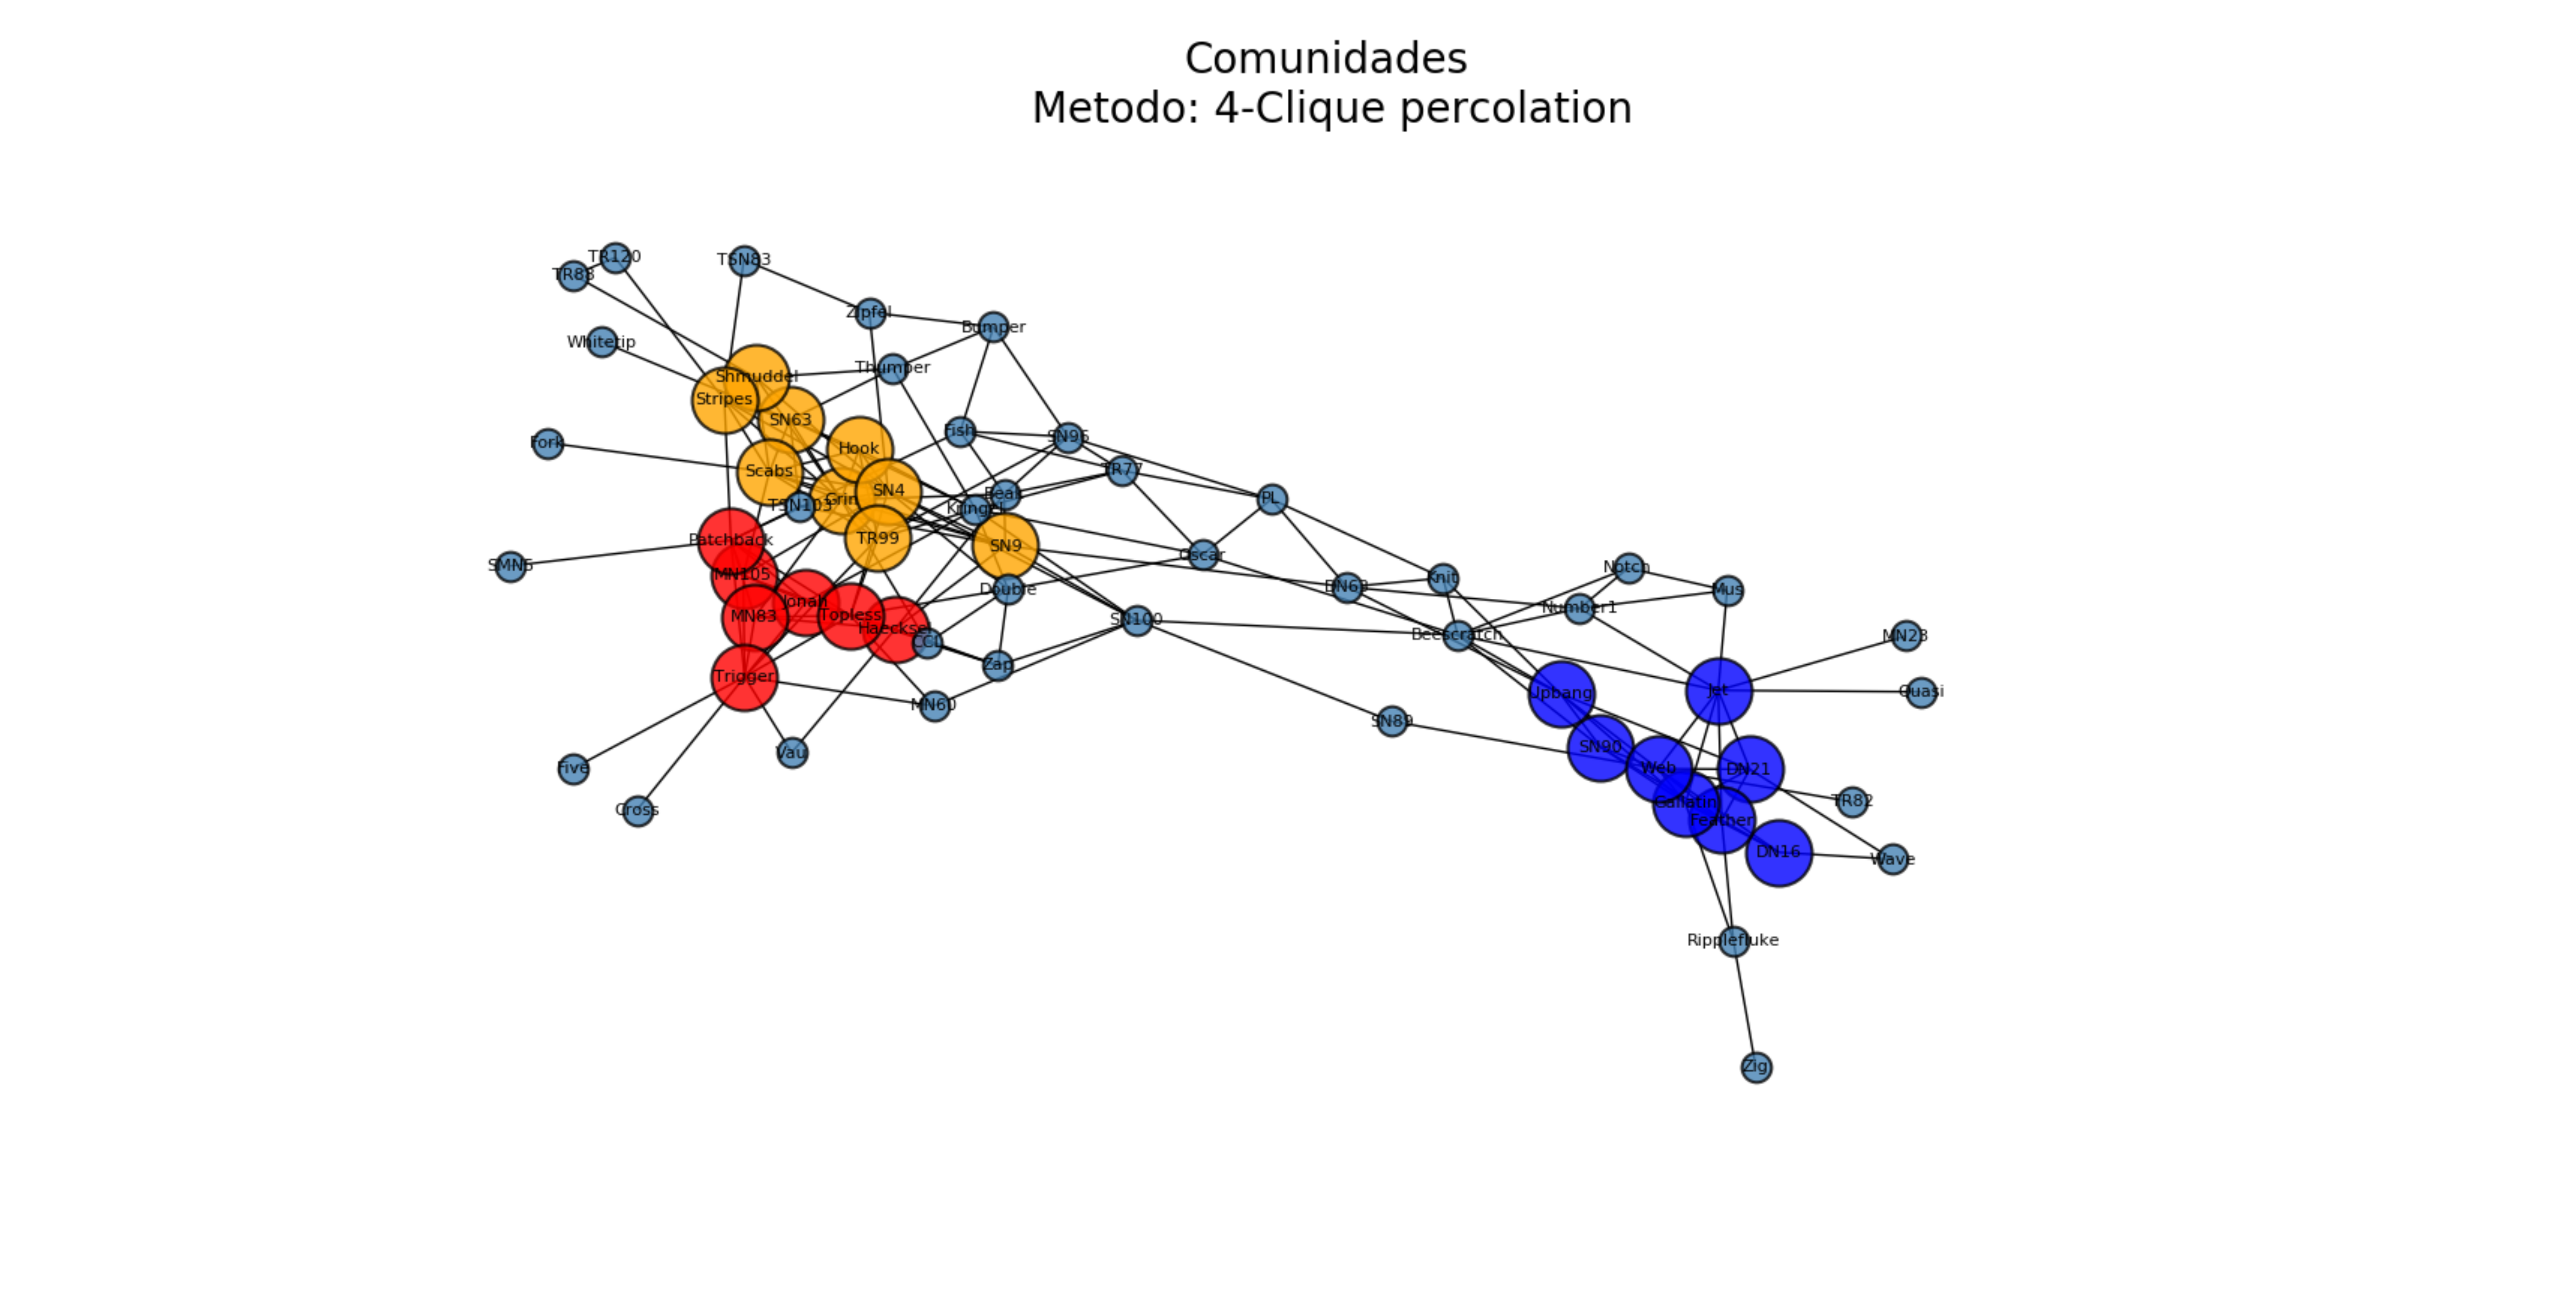

In [30]:
plt.figure(figsize=(100,100))
four_cliqueperc=plt.imread('resultados_fast_greedy/comunidad_4cliqueperc.png')
plt.imshow(four_cliqueperc)
plt.axis('off')
plt.show()